In [ ]:
# ============================================
# 🚀 AUTO-SETUP: Works in Colab & Local
# ============================================
import os
import sys

# Detect if running in Colab
try:
    import google.colab
    IN_COLAB = True
    print("🔵 Running in Google Colab")
except:
    IN_COLAB = False
    print("🟢 Running locally")

if IN_COLAB:
    # Clone repo if not exists
    if not os.path.exists('environment-ml_project'):
        print("📥 Cloning repository...")
        !git clone https://github.com/durga79/environment-ml_project.git
    
    # Change to project directory
    if os.path.exists('environment-ml_project'):
        os.chdir('environment-ml_project')
    
    # Create directories
    os.makedirs('results/figures', exist_ok=True)
    os.makedirs('results/metrics', exist_ok=True)
    os.makedirs('datasets', exist_ok=True)
    
    # Install dependencies
    print("📦 Installing dependencies...")
    !pip install -q -r requirements.txt
    
    # Add src to path
    sys.path.insert(0, 'src')
    
    # Enable plots
    %matplotlib inline
else:
    # Local setup - just add src to path
    if '../src' not in sys.path:
        sys.path.append('../src')

print(f"✅ Setup complete! Working in: {os.getcwd()}")
print(f"✅ Python path includes: {[p for p in sys.path if 'src' in p]}")
# Helper function to save figures safely
def safe_savefig(filename, **kwargs):
    """Save figure, creating directory if needed"""
    import os
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    plt.savefig(filename, **kwargs)
    print(f"✅ Saved: {filename}")


# Integrated Multi-Modal Analysis
## Combining Air Quality and Climate Text Data

This notebook explores relationships between air quality measurements and climate policy sentiment.

In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Integrated Dataset

In [2]:
print("Loading integrated dataset...")
df = pd.read_csv('datasets/integrated_multimodal.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Loading integrated dataset...
Dataset shape: (5699, 10)


,date,country,avg_pm25,avg_pm10,avg_no2,avg_aqi,aqi_category,sentiment_score,avg_impact_score,num_documents
0,2020-01-01,Austria,34.52,55.72,25.51,111.44,Unhealthy_for_Sensitive,0.0,2.84,19
1,2020-01-01,Belgium,35.30,50.16,31.84,110.88,Unhealthy_for_Sensitive,0.0,2.84,19
2,2020-01-01,France,25.21,30.96,24.35,76.50,Moderate,0.0,2.84,19
3,2020-01-01,Germany,28.43,42.14,36.86,98.36,Moderate,0.0,2.84,19
4,2020-01-01,Italy,25.09,33.22,29.72,80.92,Good,0.0,2.84,19


In [3]:
print("Dataset Info:")
df.info()
print("\nStatistical Summary:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              5699 non-null   object 
 1   country           5699 non-null   object 
 2   avg_pm25          5699 non-null   float64
 3   avg_pm10          5699 non-null   float64
 4   avg_no2           5699 non-null   float64
 5   avg_aqi           5699 non-null   float64
 6   aqi_category      5699 non-null   object 
 7   sentiment_score   5699 non-null   float64
 8   avg_impact_score  5699 non-null   float64
 9   num_documents     5699 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 445.4+ KB

Statistical Summary:


,avg_pm25,avg_pm10,avg_no2,avg_aqi,sentiment_score,avg_impact_score,num_documents
count,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000
mean,25.227603,36.852764,33.220798,92.629037,-0.008876,2.986496,36.295490
std,4.800520,9.820198,7.108986,14.939533,0.134924,0.147272,5.912643
min,7.570000,1.200000,6.400000,38.990000,-0.364000,2.570000,19.000000
25%,22.210000,30.630000,28.750000,82.775000,-0.111000,2.890000,32.000000
50%,25.160000,36.730000,33.180000,92.170000,0.000000,2.980000,36.000000
75%,28.280000,43.170000,37.610000,101.970000,0.077000,3.090000,40.000000
max,42.680000,73.340000,59.400000,146.680000,0.500000,3.670000,56.000000


## 2. Exploratory Analysis

In [4]:
print("AQI Category Distribution:")
print(df['aqi_category'].value_counts())
print("\nSentiment Score Statistics:")
print(df['sentiment_score'].describe())

AQI Category Distribution:
aqi_category
Moderate                   4329
Unhealthy_for_Sensitive    1312
Good                         58
Name: count, dtype: int64

Sentiment Score Statistics:
count    5699.000000
mean       -0.008876
std         0.134924
min        -0.364000
25%        -0.111000
50%         0.000000
75%         0.077000
max         0.500000
Name: sentiment_score, dtype: float64


## 3. Correlation Analysis

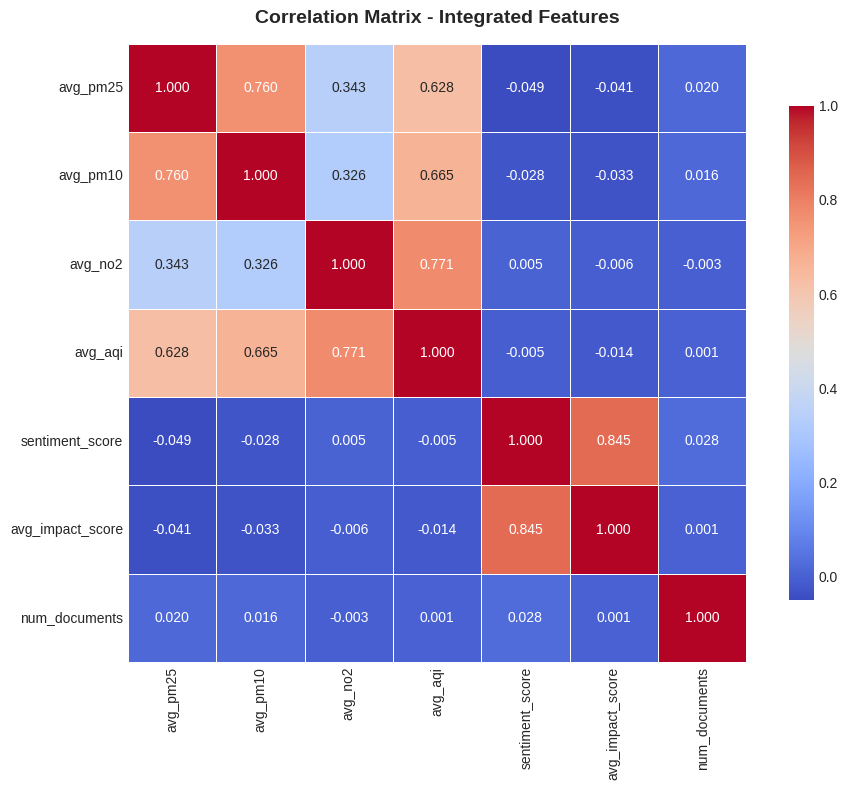

In [5]:
numeric_cols = ['avg_pm25', 'avg_pm10', 'avg_no2', 'avg_aqi', 'sentiment_score', 'avg_impact_score', 'num_documents']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Integrated Features', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
os.makedirs(os.path.dirname('results/figures/integrated_correlation.png'), exist_ok=True)
plt.savefig('results/figures/integrated_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Air Quality vs Sentiment Sentiment

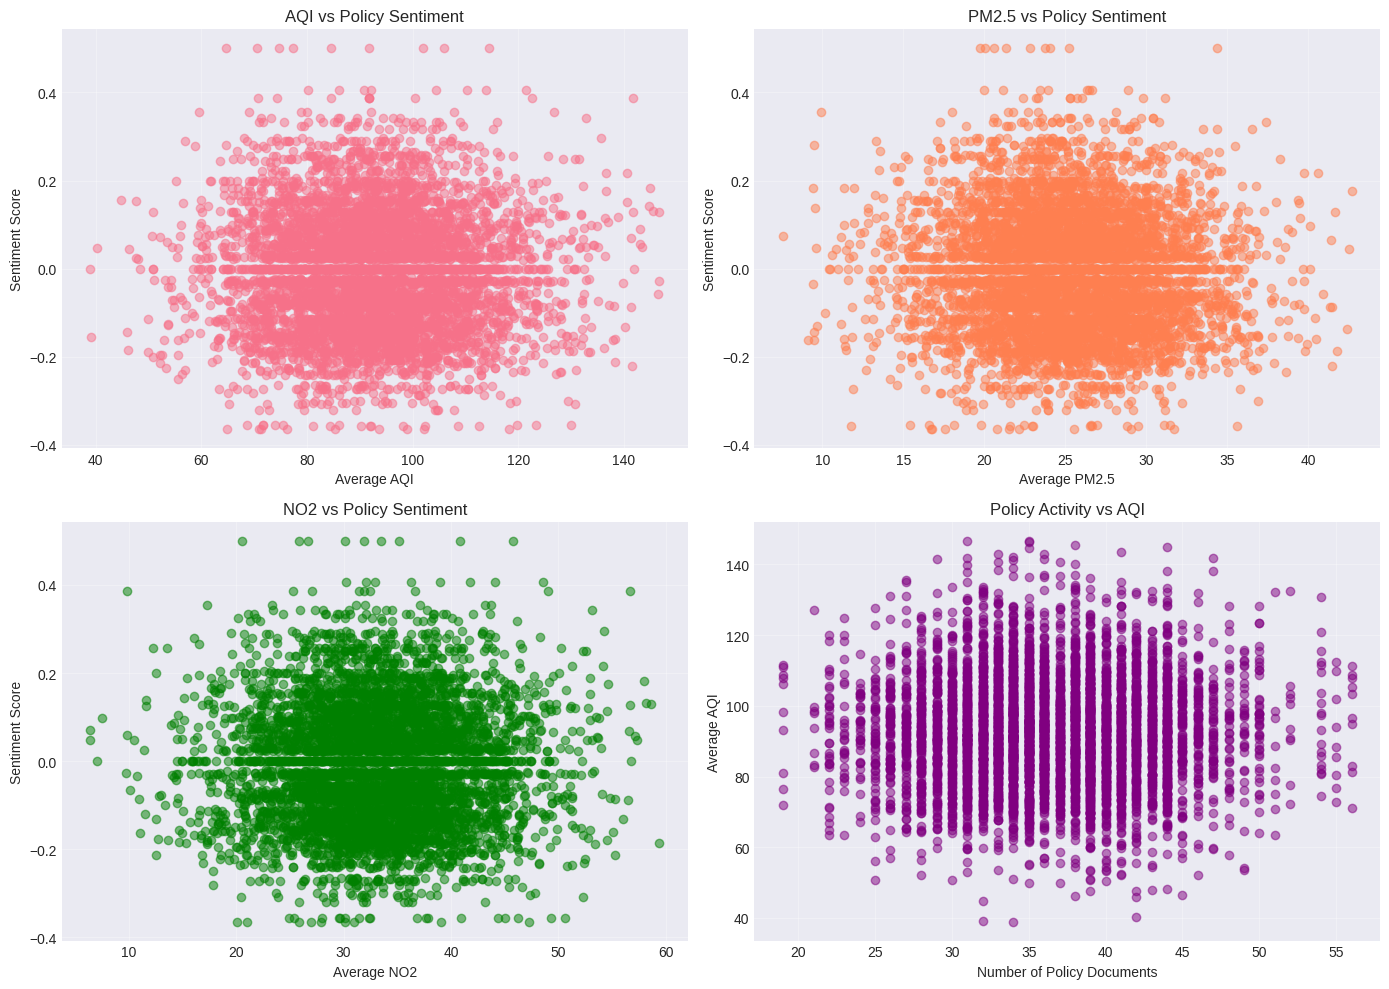

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].scatter(df['avg_aqi'], df['sentiment_score'], alpha=0.5)
axes[0, 0].set_xlabel('Average AQI')
axes[0, 0].set_ylabel('Sentiment Score')
axes[0, 0].set_title('AQI vs Policy Sentiment')
axes[0, 0].grid(alpha=0.3)

axes[0, 1].scatter(df['avg_pm25'], df['sentiment_score'], alpha=0.5, color='coral')
axes[0, 1].set_xlabel('Average PM2.5')
axes[0, 1].set_ylabel('Sentiment Score')
axes[0, 1].set_title('PM2.5 vs Policy Sentiment')
axes[0, 1].grid(alpha=0.3)

axes[1, 0].scatter(df['avg_no2'], df['sentiment_score'], alpha=0.5, color='green')
axes[1, 0].set_xlabel('Average NO2')
axes[1, 0].set_ylabel('Sentiment Score')
axes[1, 0].set_title('NO2 vs Policy Sentiment')
axes[1, 0].grid(alpha=0.3)

axes[1, 1].scatter(df['num_documents'], df['avg_aqi'], alpha=0.5, color='purple')
axes[1, 1].set_xlabel('Number of Policy Documents')
axes[1, 1].set_ylabel('Average AQI')
axes[1, 1].set_title('Policy Activity vs AQI')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
os.makedirs(os.path.dirname('results/figures/integrated_scatter_plots.png'), exist_ok=True)
plt.savefig('results/figures/integrated_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Statistical Tests

In [7]:
print("Statistical Correlation Tests:\n")

pairs = [
    ('avg_aqi', 'sentiment_score'),
    ('avg_pm25', 'sentiment_score'),
    ('avg_no2', 'sentiment_score'),
    ('num_documents', 'avg_aqi')
]

for col1, col2 in pairs:
    data1 = df[col1].dropna()
    data2 = df[col2].dropna()
    
    common_idx = data1.index.intersection(data2.index)
    data1 = data1.loc[common_idx]
    data2 = data2.loc[common_idx]
    
    pearson_r, pearson_p = stats.pearsonr(data1, data2)
    spearman_r, spearman_p = stats.spearmanr(data1, data2)
    
    print(f"{col1} vs {col2}:")
    print(f"  Pearson r: {pearson_r:.4f} (p-value: {pearson_p:.4e})")
    print(f"  Spearman ρ: {spearman_r:.4f} (p-value: {spearman_p:.4e})")
    print()

Statistical Correlation Tests:

avg_aqi vs sentiment_score:
  Pearson r: -0.0050 (p-value: 7.0572e-01)
  Spearman ρ: -0.0093 (p-value: 4.8085e-01)

avg_pm25 vs sentiment_score:
  Pearson r: -0.0495 (p-value: 1.8725e-04)
  Spearman ρ: -0.0569 (p-value: 1.6942e-05)

avg_no2 vs sentiment_score:
  Pearson r: 0.0050 (p-value: 7.0412e-01)
  Spearman ρ: 0.0052 (p-value: 6.9705e-01)

num_documents vs avg_aqi:
  Pearson r: 0.0011 (p-value: 9.3468e-01)
  Spearman ρ: -0.0005 (p-value: 9.6822e-01)



## 6. Time Series Analysis

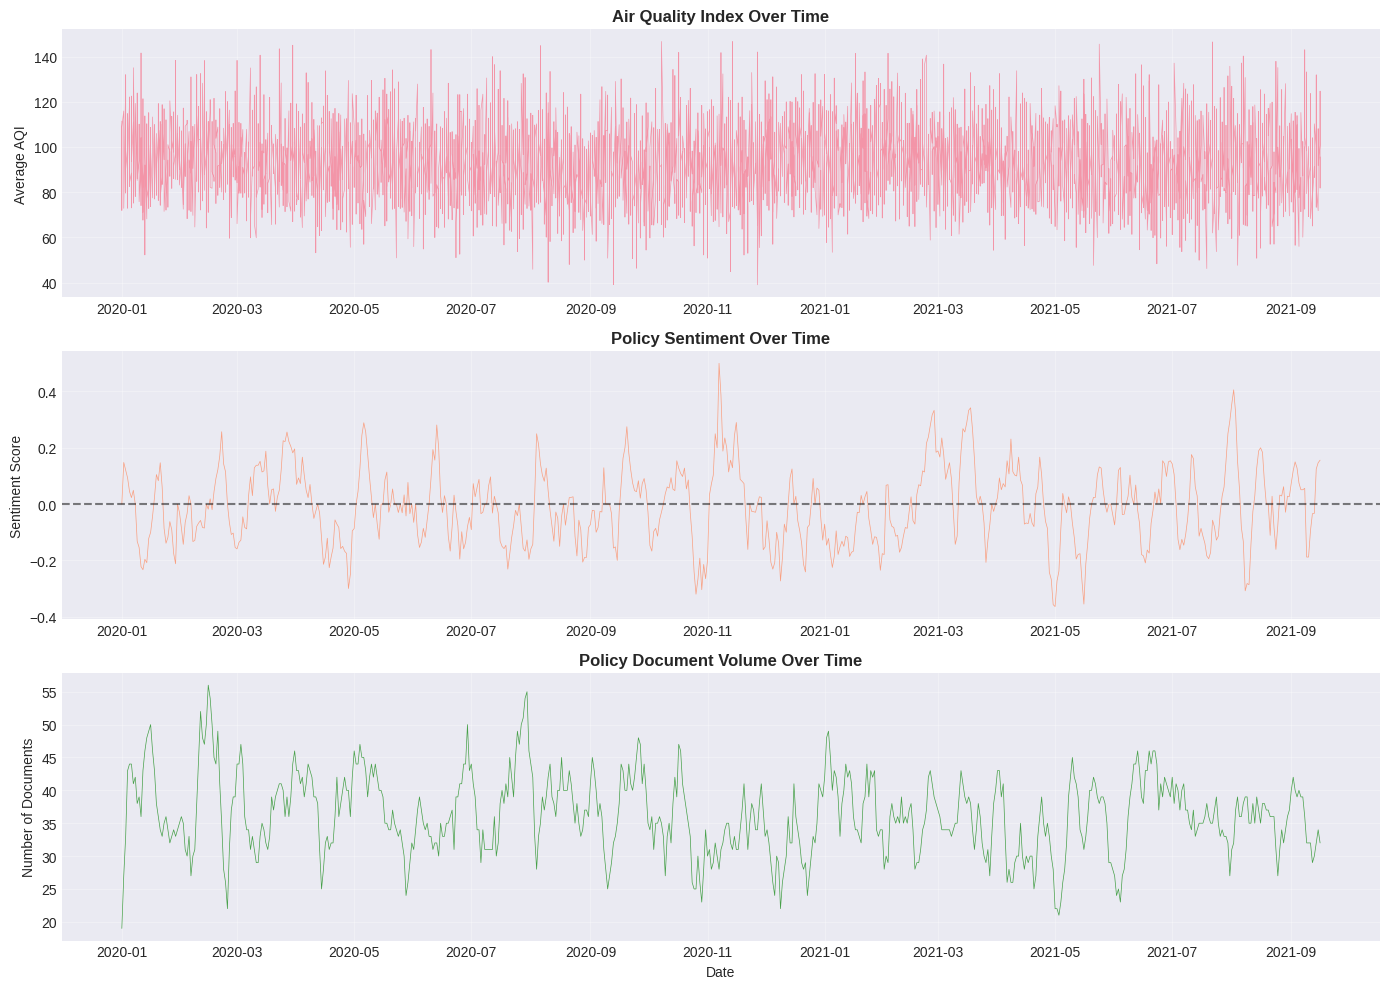

In [8]:
df['date'] = pd.to_datetime(df['date'])
df_sorted = df.sort_values('date')

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

axes[0].plot(df_sorted['date'], df_sorted['avg_aqi'], linewidth=0.5, alpha=0.7)
axes[0].set_ylabel('Average AQI')
axes[0].set_title('Air Quality Index Over Time', fontweight='bold')
axes[0].grid(alpha=0.3)

axes[1].plot(df_sorted['date'], df_sorted['sentiment_score'], linewidth=0.5, alpha=0.7, color='coral')
axes[1].set_ylabel('Sentiment Score')
axes[1].set_title('Policy Sentiment Over Time', fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)

axes[2].plot(df_sorted['date'], df_sorted['num_documents'], linewidth=0.5, alpha=0.7, color='green')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Number of Documents')
axes[2].set_title('Policy Document Volume Over Time', fontweight='bold')
axes[2].grid(alpha=0.3)

plt.tight_layout()
os.makedirs(os.path.dirname('results/figures/integrated_time_series.png'), exist_ok=True)
plt.savefig('results/figures/integrated_time_series.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Comparative Analysis by AQI Category

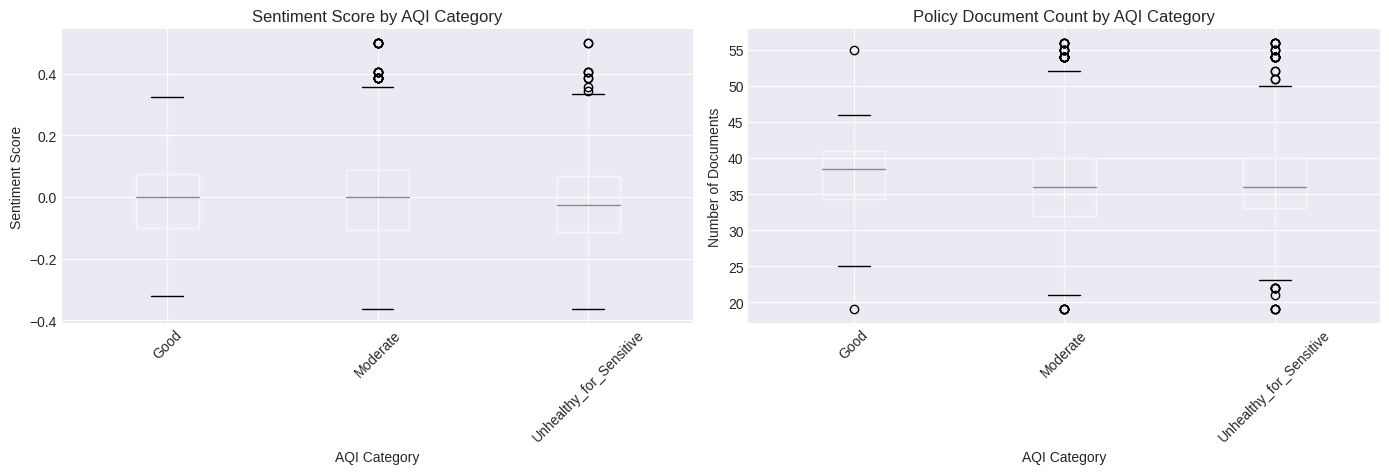

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df.boxplot(column='sentiment_score', by='aqi_category', ax=axes[0])
axes[0].set_title('Sentiment Score by AQI Category')
axes[0].set_xlabel('AQI Category')
axes[0].set_ylabel('Sentiment Score')
axes[0].get_figure().suptitle('')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)

df.boxplot(column='num_documents', by='aqi_category', ax=axes[1])
axes[1].set_title('Policy Document Count by AQI Category')
axes[1].set_xlabel('AQI Category')
axes[1].set_ylabel('Number of Documents')
axes[1].get_figure().suptitle('')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
os.makedirs(os.path.dirname('results/figures/integrated_boxplots.png'), exist_ok=True)
plt.savefig('results/figures/integrated_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
print("Average Sentiment by AQI Category:\n")
sentiment_by_aqi = df.groupby('aqi_category').agg({
    'sentiment_score': ['mean', 'std', 'count'],
    'num_documents': 'mean'
}).round(3)

print(sentiment_by_aqi)

Average Sentiment by AQI Category:

                        sentiment_score              num_documents
                                   mean    std count          mean
aqi_category                                                      
Good                             -0.002  0.121    58        37.759
Moderate                         -0.006  0.136  4329        36.215
Unhealthy_for_Sensitive          -0.019  0.130  1312        36.496


## 8. Country-wise Analysis

In [11]:
country_stats = df.groupby('country').agg({
    'avg_aqi': 'mean',
    'avg_pm25': 'mean',
    'sentiment_score': 'mean',
    'num_documents': 'sum'
}).round(2)

country_stats = country_stats.sort_values('avg_aqi', ascending=False)

print("Country-wise Statistics (Top 10 by Average AQI):\n")
print(country_stats.head(10))

Country-wise Statistics (Top 10 by Average AQI):

             avg_aqi  avg_pm25  sentiment_score  num_documents
country                                                       
France         93.88     25.54            -0.01          20833
Germany        93.05     25.48            -0.01          21495
Portugal       93.03     25.37            -0.01          21051
Poland         92.97     25.16            -0.01          20754
Belgium        92.66     25.07            -0.01          20395
Italy          92.42     25.20            -0.01          20471
Netherlands    92.40     25.11            -0.01          20465
Spain          92.38     25.02            -0.01          20132
Sweden         92.23     25.35            -0.01          20592
Austria        91.21     24.94            -0.01          20660


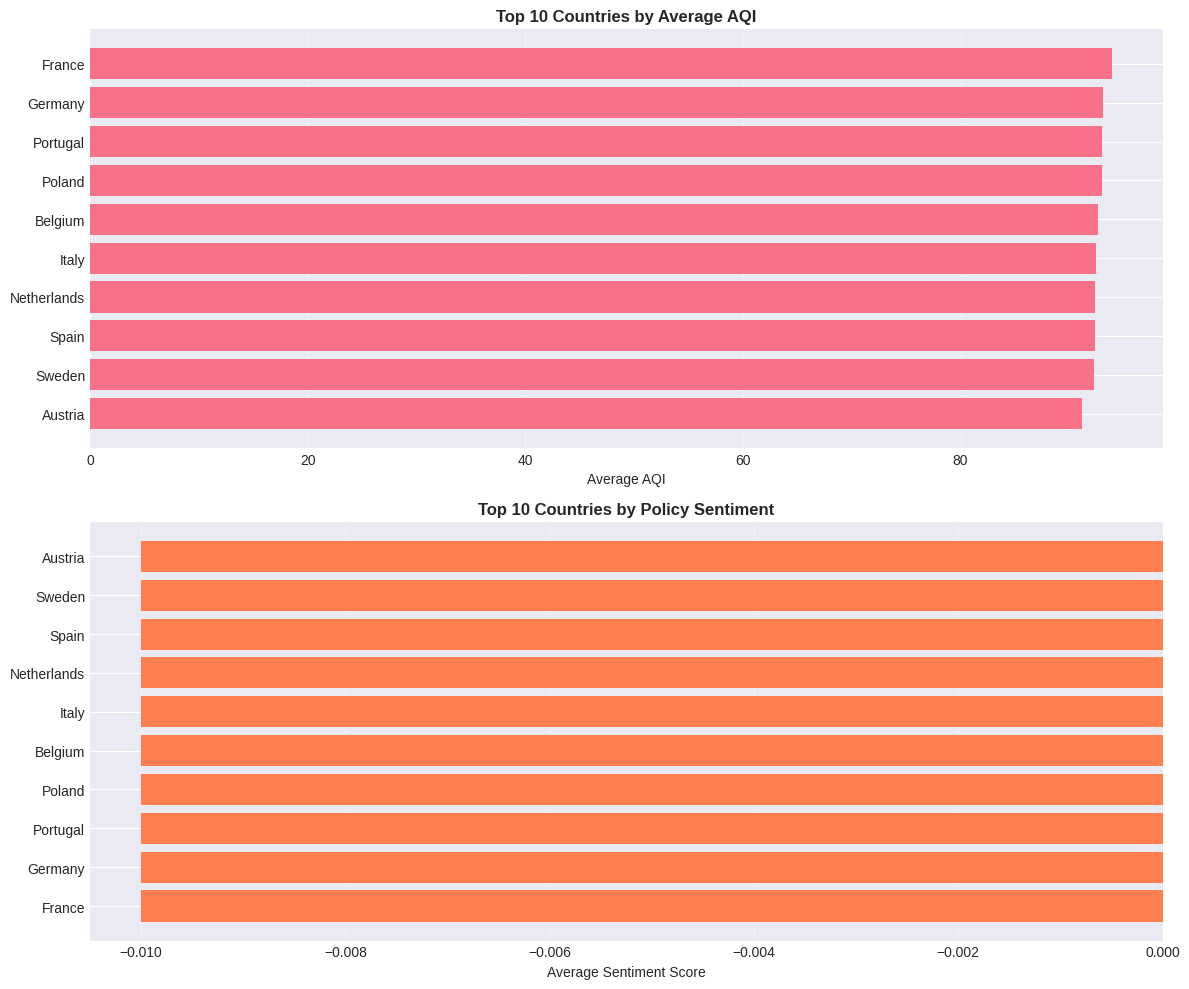

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

country_stats_sorted = country_stats.sort_values('avg_aqi', ascending=True).tail(10)
axes[0].barh(range(len(country_stats_sorted)), country_stats_sorted['avg_aqi'])
axes[0].set_yticks(range(len(country_stats_sorted)))
axes[0].set_yticklabels(country_stats_sorted.index)
axes[0].set_xlabel('Average AQI')
axes[0].set_title('Top 10 Countries by Average AQI', fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

country_stats_sorted2 = country_stats.sort_values('sentiment_score', ascending=True).tail(10)
axes[1].barh(range(len(country_stats_sorted2)), country_stats_sorted2['sentiment_score'], color='coral')
axes[1].set_yticks(range(len(country_stats_sorted2)))
axes[1].set_yticklabels(country_stats_sorted2.index)
axes[1].set_xlabel('Average Sentiment Score')
axes[1].set_title('Top 10 Countries by Policy Sentiment', fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
os.makedirs(os.path.dirname('results/figures/integrated_country_analysis.png'), exist_ok=True)
plt.savefig('results/figures/integrated_country_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. Key Findings Summary

In [13]:
print("="*60)
print("INTEGRATED ANALYSIS - KEY FINDINGS")
print("="*60)

corr_aqi_sentiment = df[['avg_aqi', 'sentiment_score']].corr().iloc[0, 1]
corr_pm25_sentiment = df[['avg_pm25', 'sentiment_score']].corr().iloc[0, 1]

print(f"\n1. CORRELATION INSIGHTS:")
print(f"   - AQI vs Sentiment: r = {corr_aqi_sentiment:.4f}")
print(f"   - PM2.5 vs Sentiment: r = {corr_pm25_sentiment:.4f}")

worst_aqi_countries = country_stats.nlargest(3, 'avg_aqi')
best_sentiment_countries = country_stats.nlargest(3, 'sentiment_score')

print(f"\n2. GEOGRAPHIC PATTERNS:")
print(f"   - Highest AQI: {', '.join(worst_aqi_countries.index.tolist())}")
print(f"   - Most Positive Sentiment: {', '.join(best_sentiment_countries.index.tolist())}")

print(f"\n3. TEMPORAL PATTERNS:")
print(f"   - Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"   - Total Observations: {len(df):,}")
print(f"   - Average Documents per Day: {df['num_documents'].mean():.1f}")

print(f"\n4. AIR QUALITY INSIGHTS:")
print(f"   - Mean AQI: {df['avg_aqi'].mean():.2f}")
print(f"   - Mean PM2.5: {df['avg_pm25'].mean():.2f} μg/m³")
print(f"   - Mean NO2: {df['avg_no2'].mean():.2f} μg/m³")

print(f"\n5. POLICY DISCOURSE INSIGHTS:")
print(f"   - Mean Sentiment: {df['sentiment_score'].mean():.3f}")
print(f"   - Sentiment Range: [{df['sentiment_score'].min():.3f}, {df['sentiment_score'].max():.3f}]")
print(f"   - Total Policy Documents: {df['num_documents'].sum():,}")

print("\n" + "="*60)

INTEGRATED ANALYSIS - KEY FINDINGS

1. CORRELATION INSIGHTS:
   - AQI vs Sentiment: r = -0.0050
   - PM2.5 vs Sentiment: r = -0.0495

2. GEOGRAPHIC PATTERNS:
   - Highest AQI: France, Germany, Portugal
   - Most Positive Sentiment: France, Germany, Portugal

3. TEMPORAL PATTERNS:
   - Date Range: 2020-01-01 00:00:00 to 2021-09-16 00:00:00
   - Total Observations: 5,699
   - Average Documents per Day: 36.3

4. AIR QUALITY INSIGHTS:
   - Mean AQI: 92.63
   - Mean PM2.5: 25.23 μg/m³
   - Mean NO2: 33.22 μg/m³

5. POLICY DISCOURSE INSIGHTS:
   - Mean Sentiment: -0.009
   - Sentiment Range: [-0.364, 0.500]
   - Total Policy Documents: 206,848



## 10. Save Analysis Results

In [14]:
integrated_results = {
    'correlations': {
        'aqi_sentiment': float(corr_aqi_sentiment),
        'pm25_sentiment': float(corr_pm25_sentiment)
    },
    'summary_statistics': {
        'mean_aqi': float(df['avg_aqi'].mean()),
        'mean_pm25': float(df['avg_pm25'].mean()),
        'mean_sentiment': float(df['sentiment_score'].mean()),
        'total_documents': int(df['num_documents'].sum())
    }
}

import json
with open('results/metrics/integrated_results.json', 'w') as f:
    json.dump(integrated_results, f, indent=2)

print("✓ Integrated analysis results saved!")
print("\nMulti-modal analysis complete!")

✓ Integrated analysis results saved!

Multi-modal analysis complete!
